In [1]:
import pandas as pd
from pathlib import Path
import numpy  as np
from sklearn.model_selection import train_test_split
from pandas_ods_reader import read_ods
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matpltlib inline

UsageError: Line magic function `%matpltlib` not found.


In [19]:
import warnings 
warnings.filterwarnings("ignore")

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.3 MB


In [99]:
data=pd.read_csv("pd_speech_features2.csv")

In [100]:
data=data.drop(['id','gender'],axis=1) 


In [106]:
labels=data["class"]
features=data.drop(['class'],axis=1)

In [107]:
features.shape,labels.shape


((755, 752), (755,))

In [108]:
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.30,random_state=99)

In [109]:
x_train.head()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
367,0.86606,0.72559,0.37811,396,395,0.004873,0.001188,0.00194,0.000009,0.00051,...,9.4594,9.4471,4.8067,5.3285,17.9988,36.3767,31.8650,28.3414,33.4690,84.4622
541,0.81974,0.67260,0.72408,493,492,0.003918,0.000028,0.00061,0.000002,0.00007,...,2.9741,2.8357,2.4945,3.0397,2.7586,2.7651,3.0928,2.7667,3.1425,3.3827
300,0.83028,0.73781,0.63977,251,250,0.007689,0.000148,0.00198,0.000015,0.00054,...,1.6899,1.6843,31.0117,9.9529,4.2578,3.9292,4.5308,32.7752,28.6830,68.8642
294,0.87793,0.67610,0.40330,326,325,0.005911,0.000050,0.00137,0.000008,0.00022,...,1.7792,1.7131,1.6497,2.3743,17.2264,7.0753,8.5284,20.0347,28.1197,56.5891
358,0.85736,0.69187,0.39397,435,434,0.004439,0.000106,0.00134,0.000006,0.00012,...,234.5598,188.4837,144.9705,114.1767,74.1286,30.7654,7.7877,3.6436,3.2001,9.5913


In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
data_default=DecisionTreeClassifier(max_depth=5)
data_default.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [112]:
y_pre_default=data_default.predict(x_test)

In [113]:
print(classification_report(y_test,y_pre_default))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67        59
           1       0.87      0.91      0.89       168

    accuracy                           0.84       227
   macro avg       0.79      0.77      0.78       227
weighted avg       0.83      0.84      0.83       227



In [114]:
 print(confusion_matrix(y_test,y_pre_default))

[[ 37  22]
 [ 15 153]]


In [115]:
print(accuracy_score(y_test,y_pre_default))

0.8370044052863436


In [119]:
from sklearn import tree

In [120]:
clf=tree.DecisionTreeClassifier(random_state=0)

In [121]:
clf.fit(features,labels)

DecisionTreeClassifier(random_state=0)

[Text(1377.3863636363637, 2184.1071428571427, 'X[124] <= 0.006\ngini = 0.378\nsamples = 755\nvalue = [191, 564]'),
 Text(413.33333333333337, 2022.3214285714287, 'X[368] <= 112.643\ngini = 0.428\nsamples = 116\nvalue = [80, 36]'),
 Text(150.3030303030303, 1860.5357142857142, 'X[482] <= 0.181\ngini = 0.391\nsamples = 30\nvalue = [8, 22]'),
 Text(75.15151515151516, 1698.75, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(225.45454545454547, 1698.75, 'X[24] <= 450.636\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(150.3030303030303, 1536.9642857142858, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(300.6060606060606, 1536.9642857142858, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(676.3636363636364, 1860.5357142857142, 'X[624] <= -1.013\ngini = 0.273\nsamples = 86\nvalue = [72, 14]'),
 Text(526.0606060606061, 1698.75, 'X[722] <= 6.014\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(450.90909090909093, 1536.9642857142858, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Tex

<Figure size 2160x720 with 0 Axes>

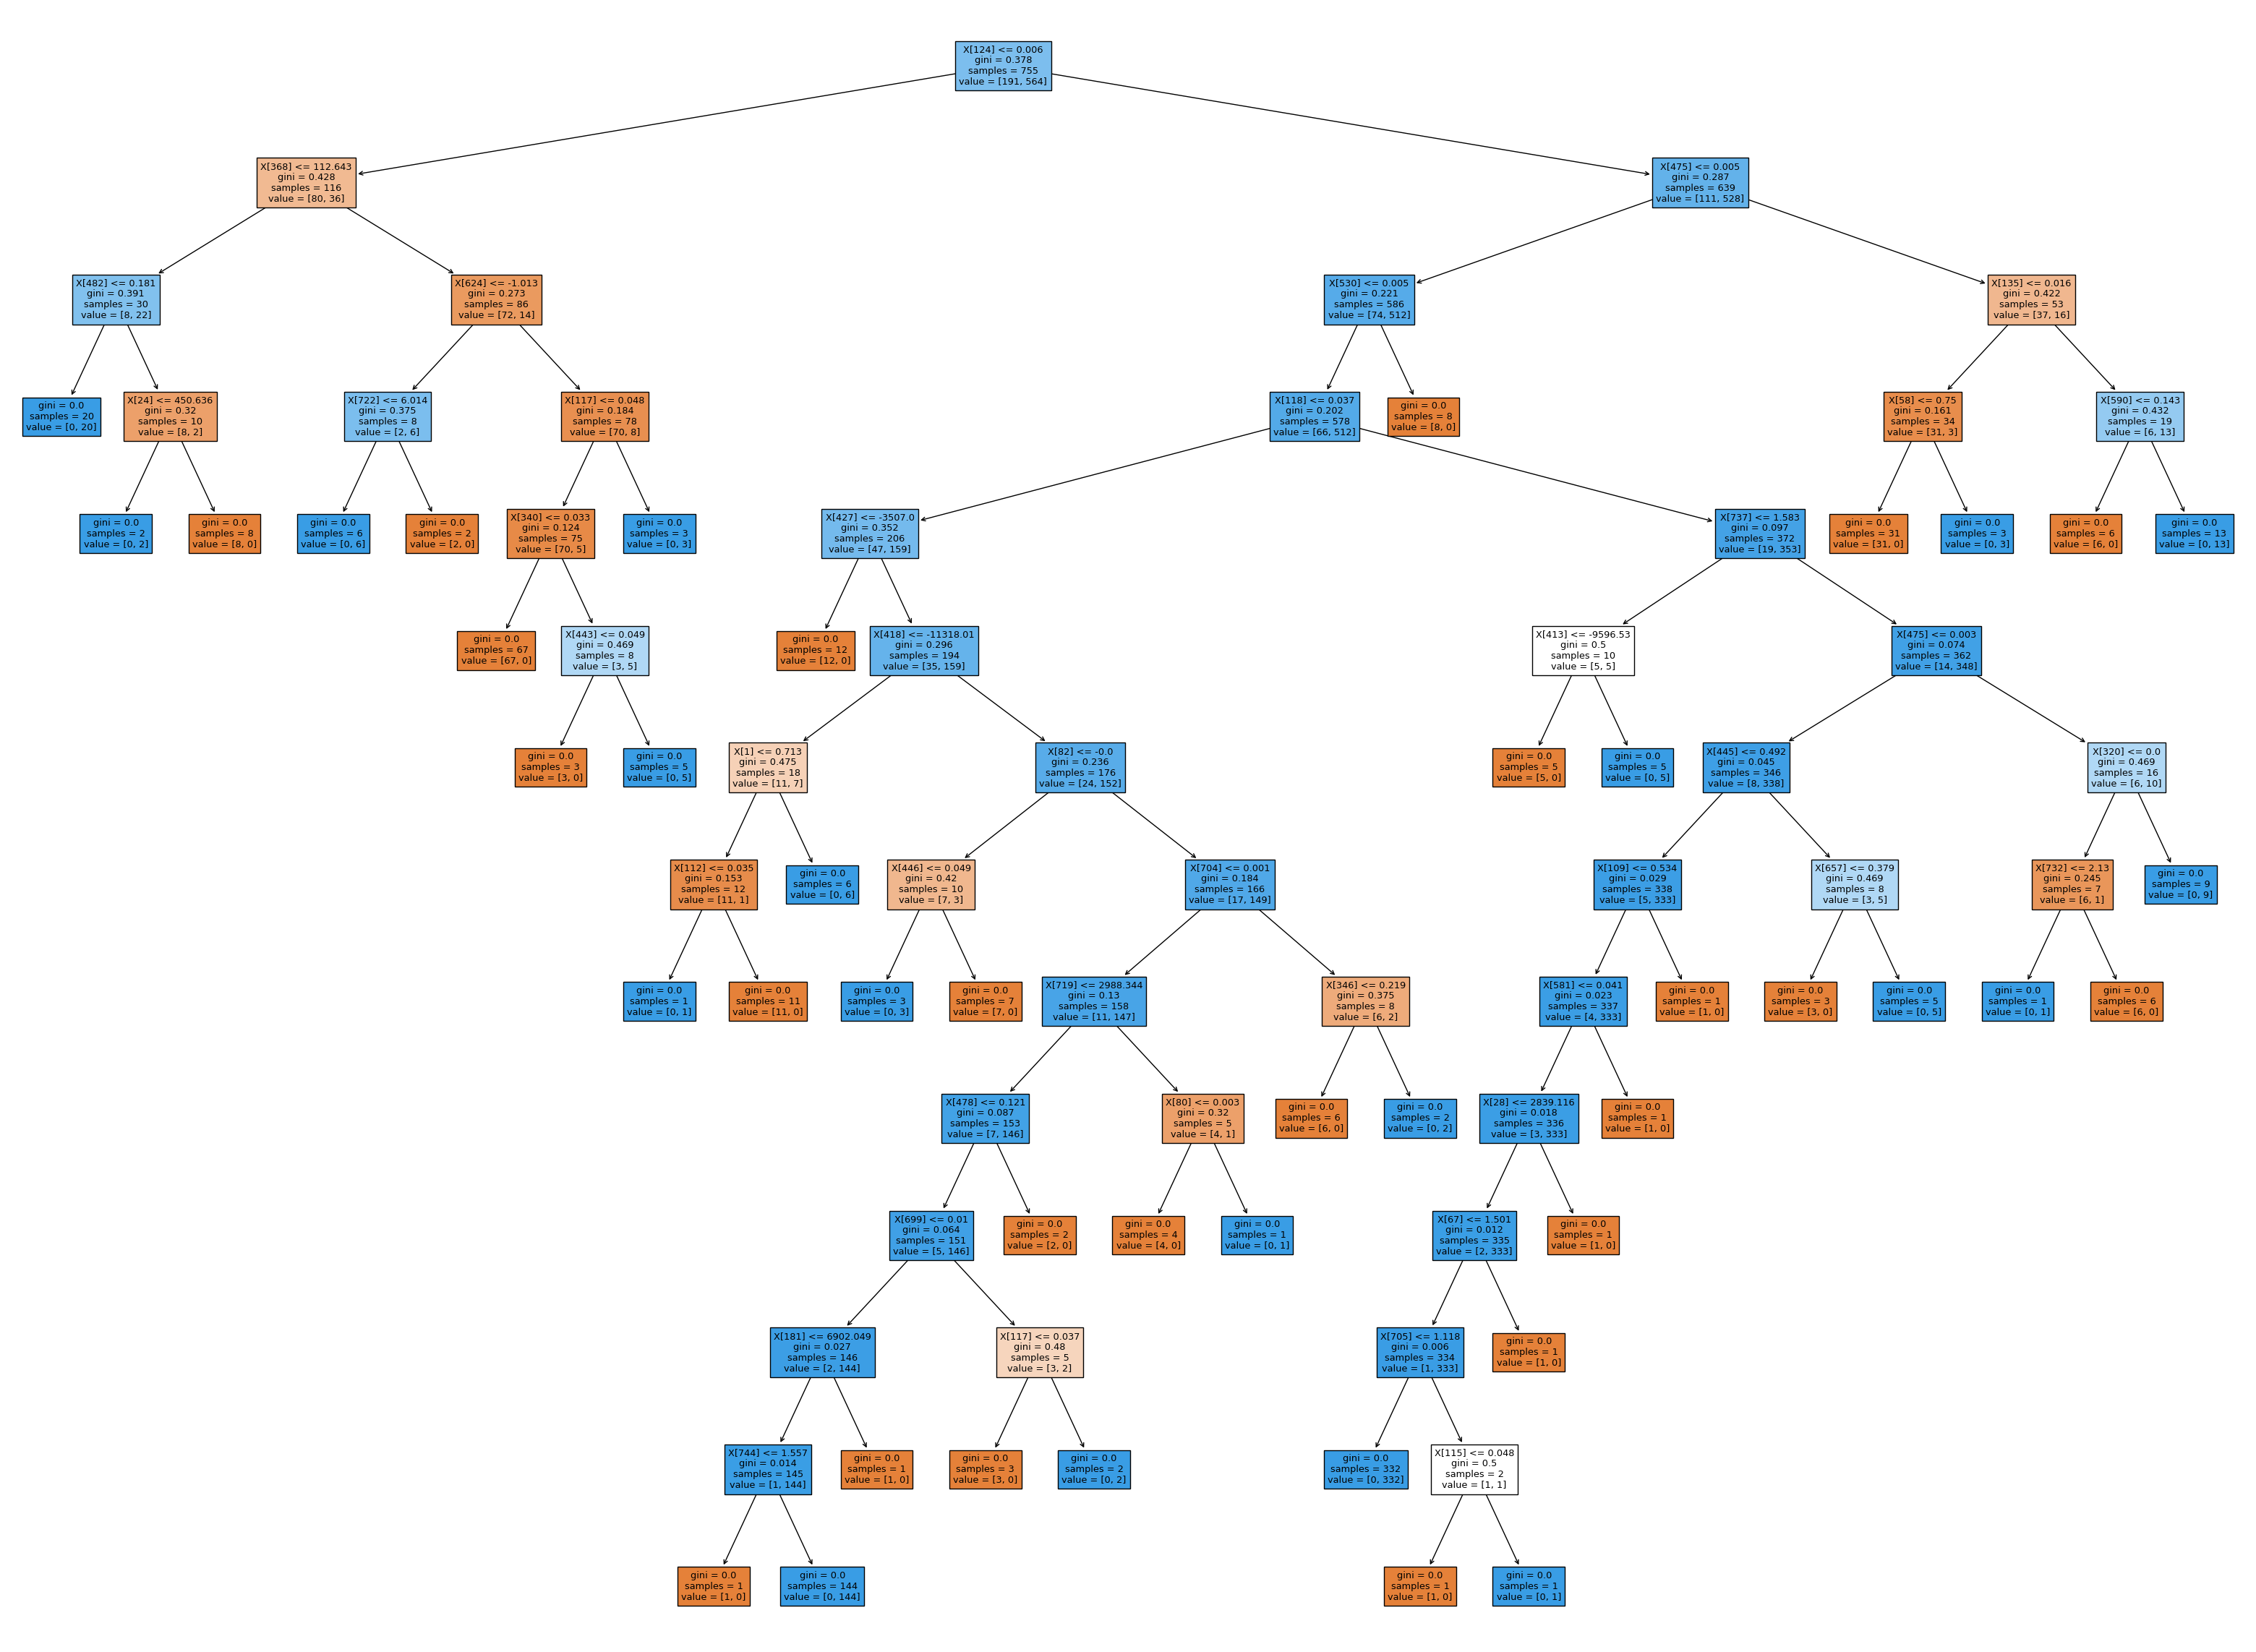

In [129]:
plt.figure(figsize=(30,10))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,30), dpi=100)
tree.plot_tree(clf,filled=True)

In [130]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [131]:
n_folds=5

In [132]:
parameter={'max_depth':range(1,40)}

In [139]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=100)

In [150]:
tree=GridSearchCV(dtree,parameter,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [151]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.052626,0.004505,0.006826,0.000469,1,{'max_depth': 1},0.783019,0.660377,0.745283,0.761905,...,0.750117,0.048552,35,0.798578,0.791469,0.815166,0.808511,0.801418,0.803028,0.008166
1,0.083037,0.000165,0.006590,0.000577,2,{'max_depth': 2},0.820755,0.773585,0.783019,0.742857,...,0.780234,0.024865,3,0.845972,0.857820,0.834123,0.839243,0.822695,0.839971,0.011728
2,0.117614,0.000599,0.006346,0.000083,3,{'max_depth': 3},0.801887,0.773585,0.820755,0.761905,...,0.797341,0.025939,1,0.890995,0.890995,0.872038,0.903073,0.872340,0.885888,0.012024
3,0.150642,0.002352,0.006380,0.000165,4,{'max_depth': 4},0.801887,0.726415,0.773585,0.771429,...,0.784187,0.039874,2,0.921801,0.936019,0.921801,0.936170,0.921986,0.927555,0.006973
4,0.177322,0.006558,0.006348,0.000087,5,{'max_depth': 5},0.801887,0.735849,0.773585,0.742857,...,0.765121,0.023730,6,0.936019,0.978673,0.940758,0.962175,0.940898,0.951705,0.016245


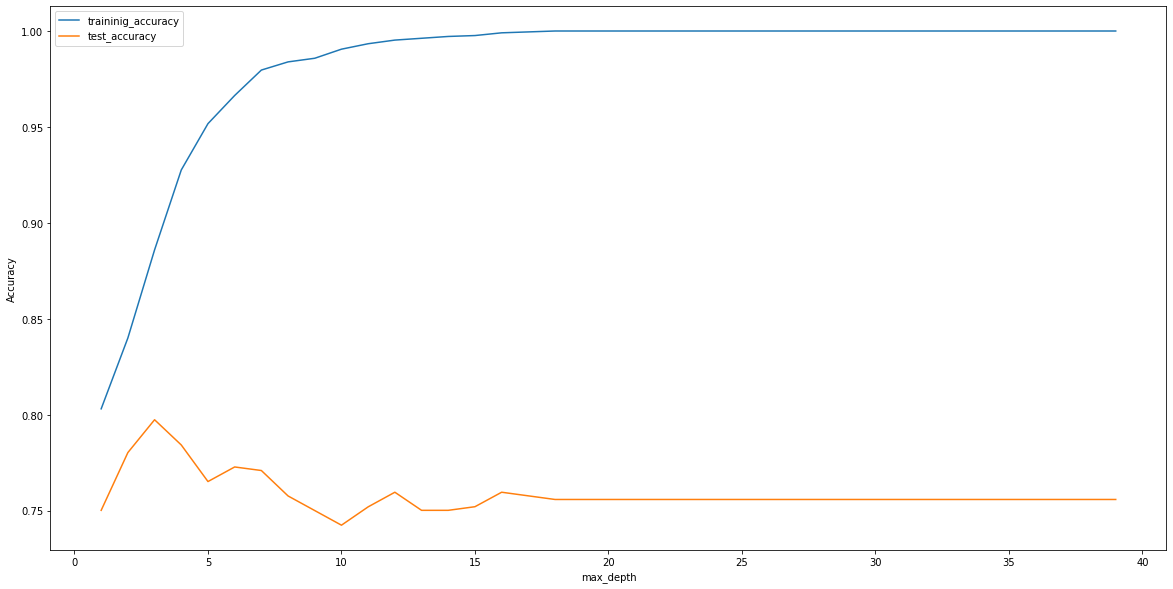

In [154]:
plt.figure(figsize=(20,10))
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
        label="traininig_accuracy")
plt.plot(scores["param_max_depth"],
        scores['mean_test_score'],
        label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [161]:
n_folds=5
parameter={'min_samples_leaf':range(5,200,20)}


In [162]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=100)

In [163]:
tree=GridSearchCV(dtree,parameter,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [164]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.290298,0.075064,0.008977,0.003515,5,{'min_samples_leaf': 5},0.735849,0.745283,0.735849,0.752381,...,0.742444,0.006228,5,0.931280,0.950237,0.938389,0.959811,0.952719,0.946487,0.010269
1,0.153565,0.019170,0.007861,0.001327,25,{'min_samples_leaf': 25},0.811321,0.716981,0.745283,0.685714,...,0.736622,0.041944,6,0.860190,0.855450,0.815166,0.839243,0.860520,0.846114,0.017308
2,0.123255,0.014509,0.007156,0.000787,45,{'min_samples_leaf': 45},0.820755,0.773585,0.745283,0.723810,...,0.751734,0.043022,1,0.800948,0.829384,0.815166,0.815603,0.801418,0.812504,0.010565
3,0.101429,0.011007,0.006938,0.000839,65,{'min_samples_leaf': 65},0.783019,0.660377,0.745283,0.761905,...,0.750117,0.048552,2,0.798578,0.791469,0.815166,0.808511,0.801418,0.803028,0.008166
4,0.083488,0.001640,0.008385,0.001579,85,{'min_samples_leaf': 85},0.820755,0.660377,0.698113,0.666667,...,0.725373,0.064188,8,0.784360,0.791469,0.803318,0.775414,0.794326,0.789777,0.009408


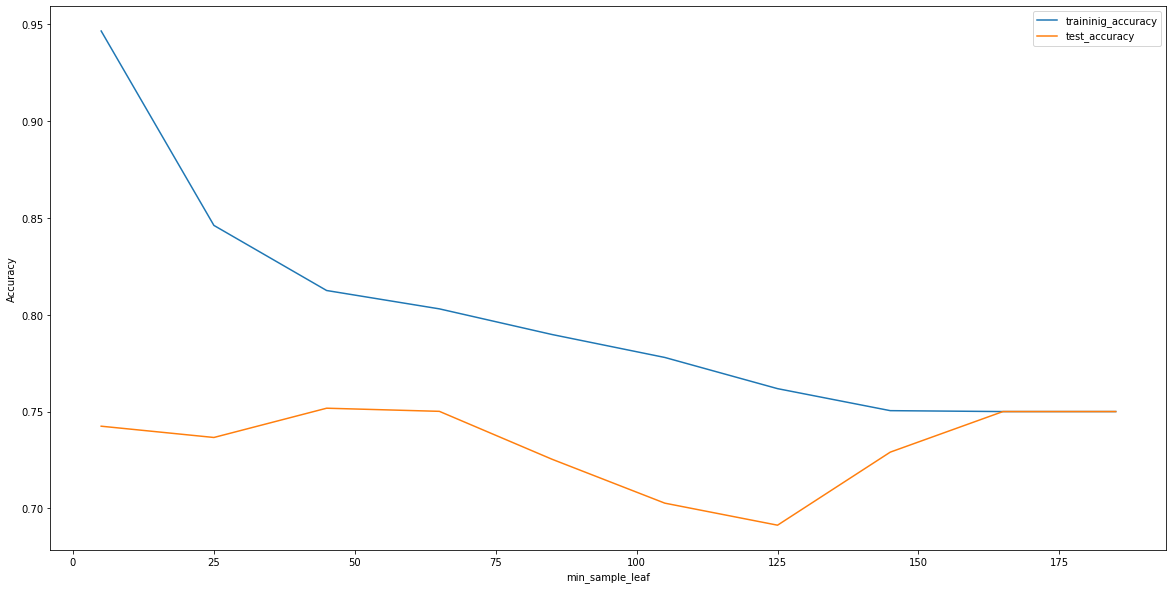

In [168]:
plt.figure(figsize=(20,10))
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
        label="traininig_accuracy")
plt.plot(scores["param_min_samples_leaf"],
        scores['mean_test_score'],
        label="test_accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [169]:
n_folds=5
parameter={'min_samples_split':range(5,200,20)}


In [170]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=100)

In [171]:
tree=GridSearchCV(dtree,parameter,cv=n_folds,scoring="accuracy",return_train_score=True)
tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [172]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.364695,0.117853,0.008787,0.001580,5,{'min_samples_split': 5},0.745283,0.764151,0.754717,0.733333,...,0.751878,0.011372,1,0.992891,0.992891,0.995261,0.995272,0.992908,0.993844,0.001161
1,0.344417,0.138752,0.007174,0.000680,25,{'min_samples_split': 25},0.707547,0.707547,0.735849,0.742857,...,0.736855,0.030431,3,0.966825,0.966825,0.928910,0.936170,0.921986,0.944143,0.019055
2,0.329153,0.111085,0.007283,0.001156,45,{'min_samples_split': 45},0.716981,0.716981,0.726415,0.733333,...,0.729218,0.013121,6,0.952607,0.924171,0.893365,0.924350,0.905437,0.919986,0.020105
3,0.306214,0.107811,0.007212,0.000656,65,{'min_samples_split': 65},0.773585,0.726415,0.735849,0.733333,...,0.742408,0.016452,2,0.907583,0.895735,0.883886,0.862884,0.895981,0.889214,0.015148
4,0.281218,0.108310,0.007239,0.001669,85,{'min_samples_split': 85},0.783019,0.726415,0.688679,0.714286,...,0.734861,0.033699,5,0.883886,0.883886,0.853081,0.839243,0.874704,0.866960,0.017854


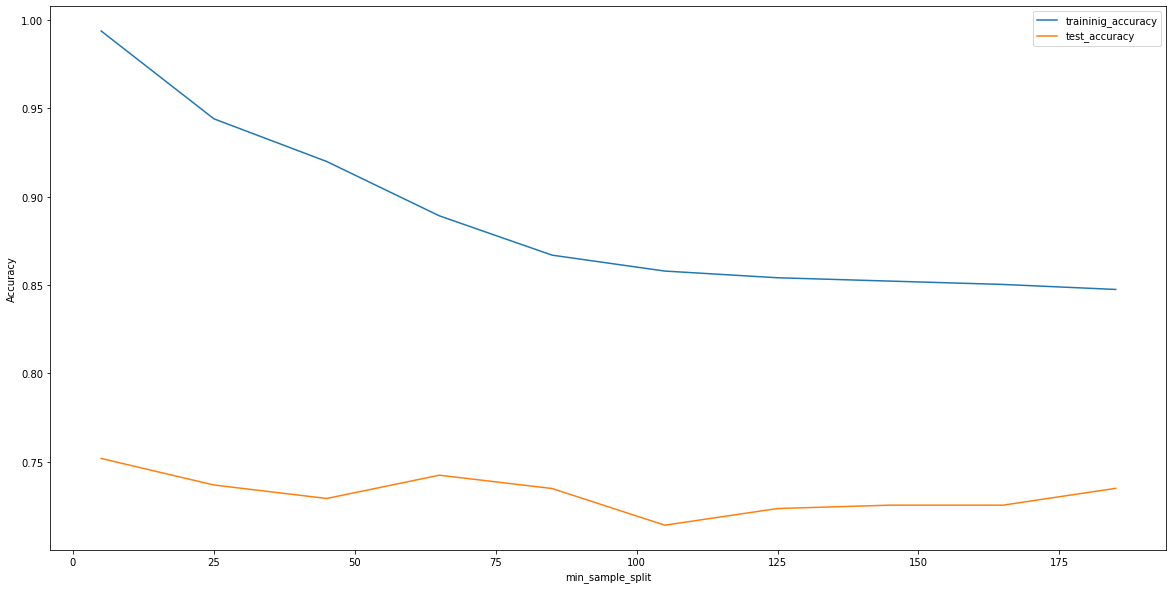

In [173]:
plt.figure(figsize=(20,10))
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
        label="traininig_accuracy")
plt.plot(scores["param_min_samples_split"],
        scores['mean_test_score'],
        label="test_accuracy")
plt.xlabel("min_sample_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [181]:
param_grid={
    'max_depth':range(5,15,5),
    'min_samples_leaf':range(50,150,50),
    'min_samples_split':range(50,150,50),
    'criterion':["entropy","gini"]
}

In [182]:
n_folds=5
dtree=DecisionTreeClassifier()

In [183]:
grid_search=GridSearchCV(estimator=dtree,param_grid=param_grid,cv=n_folds,verbose=1)

In [184]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [185]:
cv_results=pd.DataFrame(grid_search.cv_results_)

In [186]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.125413,0.009415,0.006760,0.000656,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.773585,0.707547,0.745283,0.771429,0.809524,0.761473,0.033837,3
1,0.122105,0.005403,0.006396,0.000033,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.773585,0.716981,0.745283,0.771429,0.809524,0.763360,0.030914,1
2,0.072498,0.002744,0.006572,0.000489,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.754717,0.660377,0.660377,0.666667,0.742857,0.696999,0.042513,13
3,0.071690,0.000960,0.006330,0.000032,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.754717,0.660377,0.660377,0.666667,0.742857,0.696999,0.042513,13
4,0.120982,0.005666,0.006411,0.000105,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.773585,0.716981,0.745283,0.771429,0.809524,0.763360,0.030914,1
5,0.121245,0.005039,0.006397,0.000052,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.773585,0.707547,0.745283,0.771429,0.809524,0.761473,0.033837,3
6,0.071359,0.001177,0.006442,0.000236,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.754717,0.660377,0.660377,0.666667,0.742857,0.696999,0.042513,13
7,0.071635,0.001070,0.006354,0.000046,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.754717,0.660377,0.660377,0.666667,0.742857,0.696999,0.042513,13
8,0.107952,0.009750,0.006352,0.000090,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.783019,0.773585,0.745283,0.761905,0.695238,0.751806,0.030961,5
9,0.106941,0.009710,0.006332,0.000027,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.783019,0.773585,0.745283,0.761905,0.695238,0.751806,0.030961,5


In [188]:
print("best accuracy",grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7633602875112308
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=100)


In [191]:
clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,
                              max_depth=10,min_samples_leaf=50,
                              min_samples_split=50)

In [192]:
clf_gini.fit(x_test,y_test)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [195]:
y_pred=clf_gini.predict(x_test)

In [196]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.78      0.67        59
           1       0.91      0.80      0.85       168

    accuracy                           0.80       227
   macro avg       0.75      0.79      0.76       227
weighted avg       0.83      0.80      0.81       227



In [197]:
print(confusion_matrix(y_test,y_pred))

[[ 46  13]
 [ 33 135]]


0.2599118942731278